---
# Project: Analysis of Batter-Pitcher Interactions Using Bat Speed and Swing Length

### Overview

This project aims to explore the intricate dynamics between batters and pitchers by analyzing new baseball data on bat speed and swing length. Using detailed pitch-level data from Major League Baseball games between 04/02/2024 and 06/30/2024, the study investigates how these metrics influence or reflect various aspects of the batter-pitcher interaction.

### Program Description

**Stage/Step 1:** This program utilizes pre-processed MLB data to perform model training and evaluation, focusing on the relationship between bat speed, swing length, and batter performance metrics.

### Analysis Focus

The notebook concentrates on:

- Examining the correlation between bat speed, swing length, and plate discipline.
- Identifying patterns in swing types relative to different game situations.
- Evaluating the influence of pitchers on batter swing mechanics.

### High-Level Process Flow

1. **Loading Data**
2. **Data Preprocessing**
3. **Exploratory Data Analysis**
4. **Model Training and Evaluation**
5. **Results Visualization**
6. **Exporting Findings**

### Data

- **Input Data:** MLB pitch-level dataset with bat speed and swing length metrics (04/02/2024 - 06/30/2024).
- **Output Data:** Model performance metrics, analytical results, and visualizations.

### Special Instructions

- Ensure the input data path is correctly specified before running the script.
- Dependencies include libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`.

### Author and Timing

- **Author:** *Sathwik Bollepalli*
- **Date:** *10/22/2024*

---

In [1]:
# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# Read in Data

In [3]:
pitch_swing_data = pd.read_csv(
    'statcast_pitch_swing_data_20240402_20240630.zip', 
    compression='zip',
    engine='python'
)
pitch_swing_data.shape

(346250, 94)

In [4]:
pitch_swing_data.sample(5)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
263927,FF,2024-06-09,95.0,-1.03,5.94,"Santana, Carlos",467793,676702,NaN,ball,...,4,4,4,Standard,Standard,208.0,0.000,0.025,NaN,NaN
188409,FF,2024-05-20,91.8,2.67,6.02,"Perkins, Blake",663368,677053,NaN,called_strike,...,1,2,1,Standard,Standard,145.0,0.000,-0.111,NaN,NaN
243935,FF,2024-06-04,92.4,-1.77,5.76,"Ozuna, Marcell",542303,502624,NaN,swinging_strike,...,3,7,3,Standard,Standard,206.0,0.000,-0.044,73.973212,6.16332
299310,FF,2024-06-18,92.1,-3.78,4.70,"Sheets, Gavin",657757,605463,NaN,foul,...,2,2,0,Infield shade,Standard,245.0,0.000,-0.047,63.637789,5.65958
233236,FC,2024-06-01,90.4,-1.54,6.00,"Santander, Anthony",623993,671737,home_run,hit_into_play,...,3,3,0,Infield shade,Standard,162.0,0.081,1.037,76.123724,8.06524


# Data Cleaning / EDA

In [5]:
pitch_swing_data.describe()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
count,345997.000000,345998.000000,345998.000000,346250.000000,346250.000000,0.0,0.0,0.0,0.0,345998.000000,...,346250.000000,346250.000000,346250.000000,346250.000000,346250.000000,344049.000000,346250.000000,346230.000000,155826.000000,155812.000000
mean,89.054222,-0.808297,5.760631,640341.389103,635722.940624,NaN,NaN,NaN,NaN,9.040442,...,2.183864,2.231353,2.112918,2.160407,2.183864,175.860424,0.000148,-0.000182,69.524839,7.228375
std,5.938723,1.870899,0.536150,50853.025059,53502.645360,NaN,NaN,NaN,NaN,4.239416,...,2.548858,2.556218,2.457642,2.466640,2.548858,72.457796,0.027843,0.240541,8.587908,0.979416
min,31.900000,-4.680000,0.850000,444482.000000,434378.000000,NaN,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.776000,-1.479000,0.851208,0.305870
25%,84.700000,-2.120000,5.490000,621028.000000,607192.000000,NaN,NaN,NaN,NaN,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,128.000000,0.000000,-0.064000,67.006615,6.660660
50%,89.900000,-1.490000,5.800000,663624.000000,656887.000000,NaN,NaN,NaN,NaN,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,199.000000,0.000000,-0.015000,70.907687,7.282000
75%,93.900000,0.920000,6.090000,671218.000000,670059.000000,NaN,NaN,NaN,NaN,13.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,223.000000,0.000000,0.032000,74.197170,7.884032
max,104.000000,4.620000,7.530000,808982.000000,814005.000000,NaN,NaN,NaN,NaN,14.000000,...,20.000000,17.000000,20.000000,20.000000,20.000000,360.000000,0.840000,3.503000,87.978801,10.386860


In [6]:
pitch_swing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346250 entries, 0 to 346249
Data columns (total 94 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pitch_type                       346000 non-null  object 
 1   game_date                        346250 non-null  object 
 2   release_speed                    345997 non-null  float64
 3   release_pos_x                    345998 non-null  float64
 4   release_pos_z                    345998 non-null  float64
 5   player_name                      346250 non-null  object 
 6   batter                           346250 non-null  int64  
 7   pitcher                          346250 non-null  int64  
 8   events                           89144 non-null   object 
 9   description                      346250 non-null  object 
 10  spin_dir                         0 non-null       float64
 11  spin_rate_deprecated             0 non-null       float64
 12  br

## Columns with more than 100% missing

In [7]:
missing_pct = pd.DataFrame(pitch_swing_data.isnull().mean()*100).reset_index()

missing_pct[missing_pct[0]>99]

,index,0
10,spin_dir,100.0
11,spin_rate_deprecated,100.0
12,break_angle_deprecated,100.0
13,break_length_deprecated,100.0
39,tfs_deprecated,100.0
40,tfs_zulu_deprecated,100.0
42,umpire,100.0
43,sv_id,100.0


In [8]:
missing_pct[missing_pct[0]>99]['index'].values

array(['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated',
       'break_length_deprecated', 'tfs_deprecated', 'tfs_zulu_deprecated',
       'umpire', 'sv_id'], dtype=object)

## Dropping Completely null columns

In [9]:
pitch_swing_data.drop(missing_pct[missing_pct[0]>99]['index'].values, axis =1, inplace = True)

In [10]:
# Check number of unique values for categorical columns
for col in pitch_swing_data.columns:
    data_type = pitch_swing_data[col].dtype
    if data_type == 'object':
        num_unique = pitch_swing_data[col].nunique()
        print(f"{col} ({data_type}): {num_unique} unique values")


pitch_type (object): 16 unique values
game_date (object): 90 unique values
player_name (object): 559 unique values
events (object): 29 unique values
description (object): 13 unique values
des (object): 62167 unique values
game_type (object): 1 unique values
stand (object): 2 unique values
p_throws (object): 2 unique values
home_team (object): 30 unique values
away_team (object): 30 unique values
type (object): 3 unique values
bb_type (object): 4 unique values
inning_topbot (object): 2 unique values
pitch_name (object): 16 unique values
if_fielding_alignment (object): 3 unique values
of_fielding_alignment (object): 2 unique values


## Dropping game_type, it has only 1 value/category

In [11]:
pitch_swing_data.drop(['game_type'], axis =1, inplace = True)

In [12]:
pitch_swing_data[pitch_swing_data['game_pk'] == 745273]#['pitch_number']

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,2024-04-02,95.0,-2.01,5.22,"Rocchio, Brayan",677587,622491,single,hit_into_play,...,0,4,0,Infield shade,Standard,239.0,-0.006,0.388,NaN,NaN
1,CH,2024-04-02,88.5,-2.09,4.95,"Rocchio, Brayan",677587,622491,NaN,foul,...,0,4,0,Standard,Standard,253.0,0.000,-0.045,NaN,NaN
2,SI,2024-04-02,95.0,-2.02,5.12,"Rocchio, Brayan",677587,622491,NaN,called_strike,...,0,4,0,Standard,Standard,238.0,0.000,-0.042,NaN,NaN
4,FF,2024-04-02,95.4,-1.95,5.12,"Hedges, Austin",595978,622491,strikeout,foul_tip,...,0,4,0,Standard,Standard,238.0,0.008,-0.215,NaN,NaN
9,SI,2024-04-02,94.0,-1.90,4.99,"Hedges, Austin",595978,622491,NaN,called_strike,...,0,4,0,Standard,Standard,239.0,0.000,-0.067,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,FC,2024-04-02,90.1,-3.40,5.20,"Kwan, Steven",680757,676092,NaN,called_strike,...,2,5,2,Standard,Standard,180.0,0.000,-0.033,NaN,NaN
3582,CH,2024-04-02,76.5,-0.51,5.88,"Raleigh, Cal",663728,669212,NaN,called_strike,...,0,0,5,Infield shade,Standard,269.0,0.000,-0.033,NaN,NaN
3607,SI,2024-04-02,94.5,-2.64,5.37,"Freeman, Tyler",671289,675989,NaN,called_strike,...,0,4,0,Standard,Standard,224.0,0.000,-0.068,NaN,NaN
3608,SI,2024-04-02,94.8,-2.50,5.12,"Kwan, Steven",680757,622491,NaN,called_strike,...,0,0,0,Standard,Standard,235.0,0.000,-0.033,NaN,NaN


In [16]:
pitch_swing_data[[ 'game_pk', 'pitch_number', 'at_bat_number']].drop_duplicates()

,game_pk,pitch_number,at_bat_number
0,745273,3,46
1,745273,2,46
2,745273,1,46
3,746169,4,37
4,745273,4,45
...,...,...,...
346245,746779,1,73
346246,746779,1,82
346247,744916,1,72
346248,745555,1,70


In [17]:
# Identify categorical columns
categorical_columns = pitch_swing_data.select_dtypes(include=['object']).columns

# Print value counts for each categorical column
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(pitch_swing_data[col].value_counts())
    print("\n")

Value counts for pitch_type:
pitch_type
FF    108346
SL     57024
SI     55770
CH     35317
FC     28199
CU     22573
ST     20013
FS     10920
KC      5524
SV      1159
KN       576
FA       288
EP       166
FO       102
PO        20
CS         3
Name: count, dtype: int64


Value counts for game_date:
game_date
2024-04-13    5031
2024-04-20    4854
2024-05-29    4733
2024-04-30    4648
2024-06-29    4621
              ... 
2024-04-04    1872
2024-05-16    1837
2024-05-02    1770
2024-04-11    1499
2024-04-18    1096
Name: count, Length: 90, dtype: int64


Value counts for player_name:
player_name
Soto, Juan           1477
Volpe, Anthony       1463
Schwarber, Kyle      1436
Judge, Aaron         1431
Olson, Matt          1426
                     ... 
Ornelas, Jonathan       5
McGough, Scott          4
Vazquez, Luis           4
Castillo, Luis          3
Bañuelos, David         2
Name: count, Length: 559, dtype: int64


Value counts for events:
events
field_out                       3651

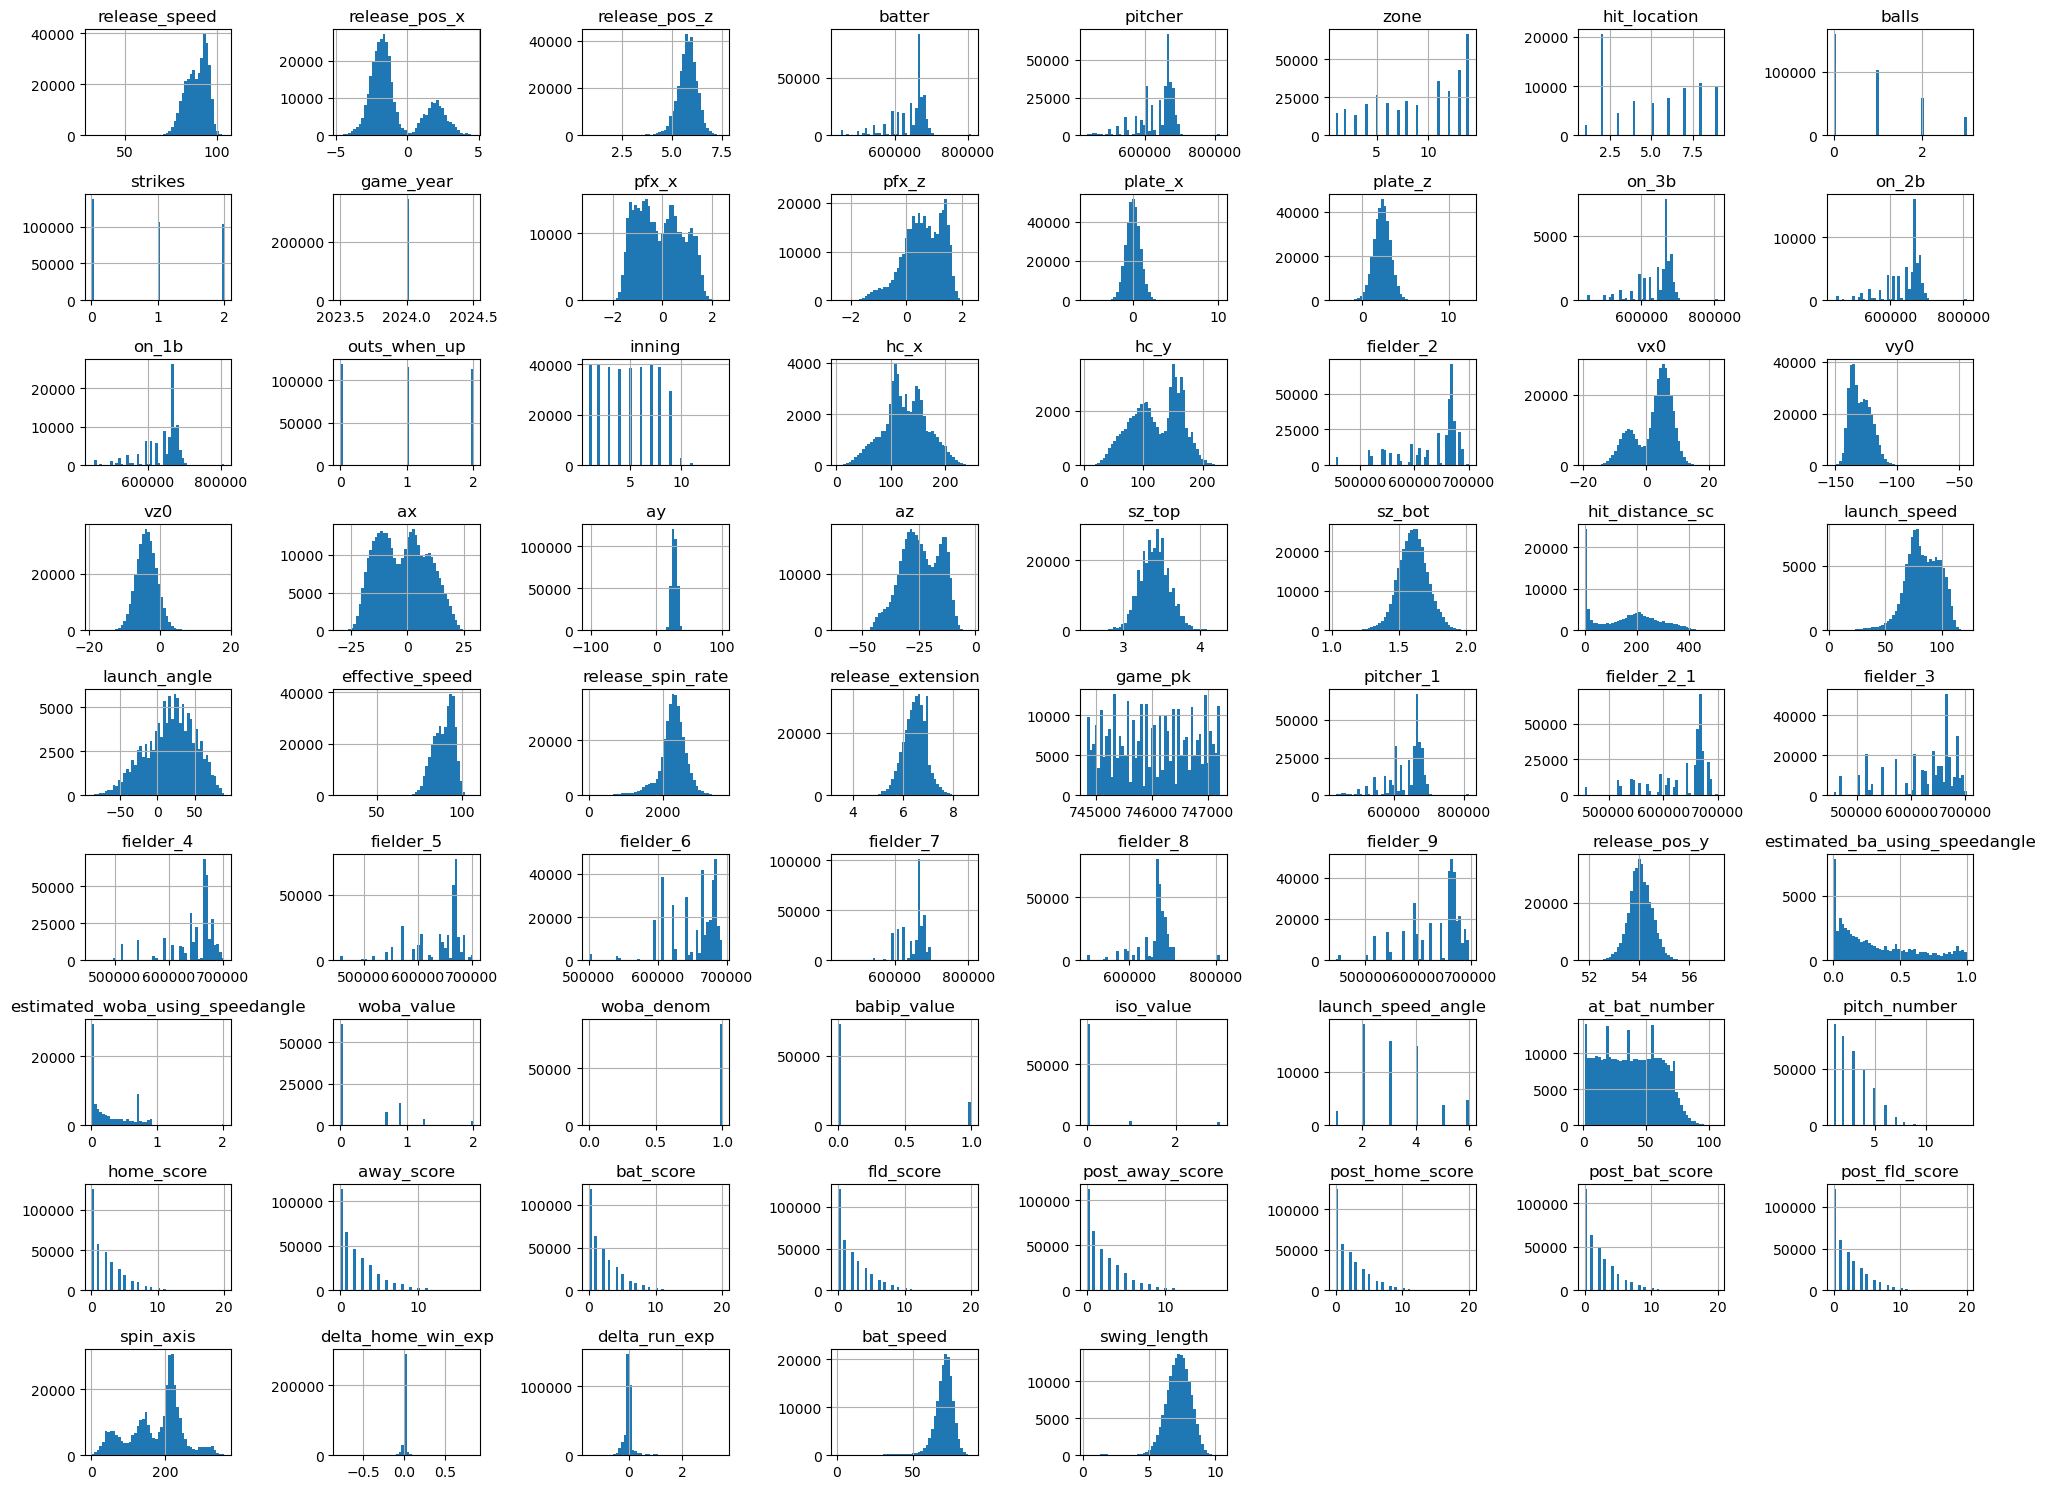

In [18]:
# Select continuous variables (numeric columns)
continuous_columns = pitch_swing_data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for each continuous variable
pitch_swing_data[continuous_columns].hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

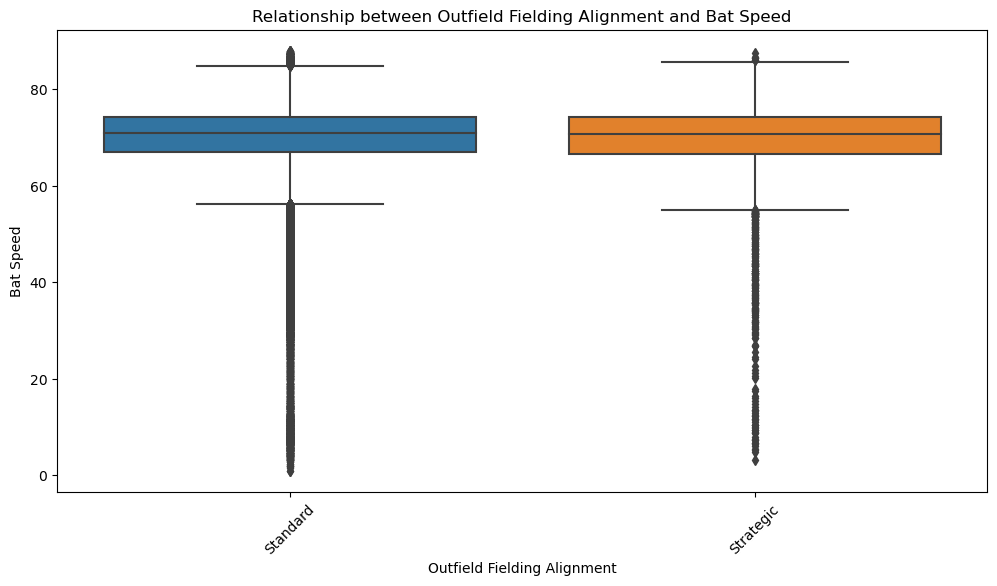

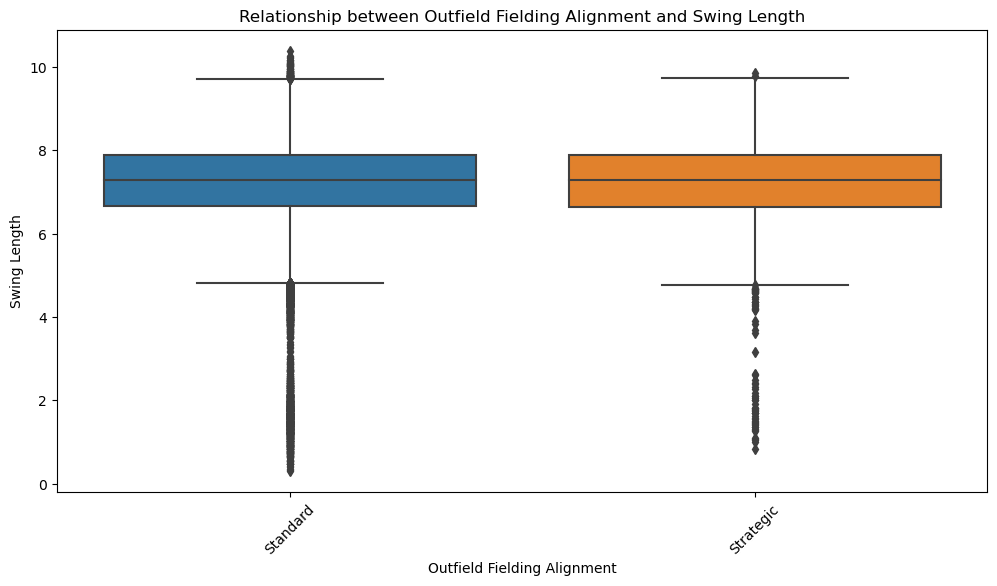

In [33]:
# Plot the relationship between of_fielding_alignment and bat_speed
plt.figure(figsize=(12, 6))
sns.boxplot(x='of_fielding_alignment', y='bat_speed', data=filtered_data)
plt.title('Relationship between Outfield Fielding Alignment and Bat Speed')
plt.xlabel('Outfield Fielding Alignment')
plt.ylabel('Bat Speed')
plt.xticks(rotation=45)
plt.show()

# Plot the relationship between of_fielding_alignment and swing_length
plt.figure(figsize=(12, 6))
sns.boxplot(x='of_fielding_alignment', y='swing_length', data=filtered_data)
plt.title('Relationship between Outfield Fielding Alignment and Swing Length')
plt.xlabel('Outfield Fielding Alignment')
plt.ylabel('Swing Length')
plt.xticks(rotation=45)
plt.show()

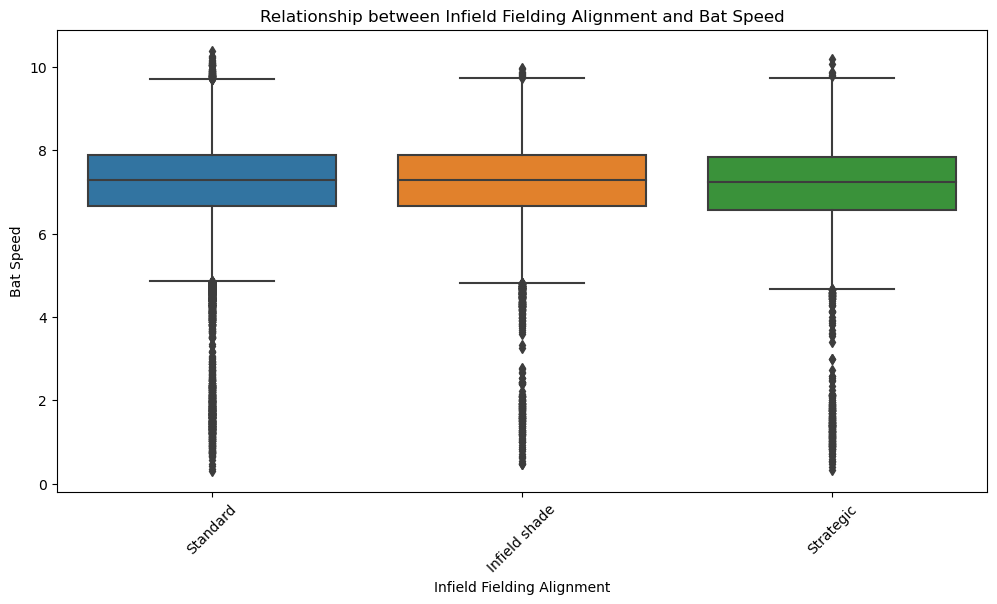

In [32]:
# Drop rows with missing values in 'if_fielding_alignment' or 'bat_speed'
filtered_data = pitch_swing_data.dropna(subset=['if_fielding_alignment', 'bat_speed'])

# Plot the relationship
plt.figure(figsize=(12, 6))
sns.boxplot(x='if_fielding_alignment', y='swing_length', data=filtered_data)
plt.title('Relationship between Infield Fielding Alignment and Bat Speed')
plt.xlabel('Infield Fielding Alignment')
plt.ylabel('Bat Speed')
plt.xticks(rotation=45)
plt.show()

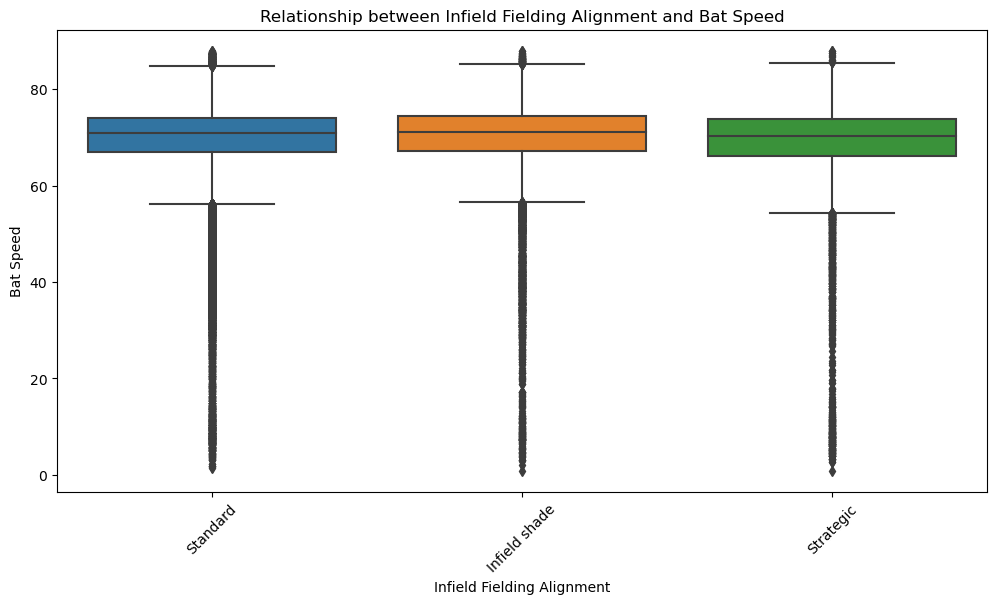

In [30]:
# Plot the relationship
plt.figure(figsize=(12, 6))
sns.boxplot(x='if_fielding_alignment', y='bat_speed', data=filtered_data)
plt.title('Relationship between Infield Fielding Alignment and Bat Speed')
plt.xlabel('Infield Fielding Alignment')
plt.ylabel('Bat Speed')
plt.xticks(rotation=45)
plt.show()

In [27]:
pitch_swing_data['balls'].value_counts()

balls
0    158260
1    102173
2     57707
3     28110
Name: count, dtype: int64

In [26]:
pitch_swing_data['hit_location'].value_counts()

hit_location
2.0    20520
8.0    10696
9.0     9834
7.0     9551
6.0     7551
4.0     6992
5.0     6538
3.0     4510
1.0     2170
Name: count, dtype: int64

In [25]:
pitch_swing_data['zone'].value_counts()

zone
14.0    66145
13.0    42739
11.0    35822
12.0    28753
5.0     26187
8.0     22494
6.0     21387
4.0     20401
9.0     20097
2.0     17517
7.0     16550
1.0     14514
3.0     13392
Name: count, dtype: int64

In [22]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = pitch_swing_data[continuous_columns].corr()

high_corr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                   for i in range(len(corr_matrix.columns)) 
                   for j in range(i+1, len(corr_matrix.columns)) 
                   if abs(corr_matrix.iloc[i, j]) > 0.8]

high_corr_pairs


[('release_speed', 'vy0', -0.9997765218350713),
 ('release_speed', 'ay', 0.8138175401349784),
 ('release_speed', 'effective_speed', 0.9907109804034261),
 ('release_pos_x', 'vx0', -0.9069052978158635),
 ('pitcher', 'pitcher_1', 1.0),
 ('balls', 'pitch_number', 0.8123687506125957),
 ('pfx_x', 'ax', 0.981743334771749),
 ('pfx_z', 'az', 0.9857946335002246),
 ('inning', 'at_bat_number', 0.9753514688953183),
 ('hc_y', 'hit_distance_sc', -0.8713273940124494),
 ('fielder_2', 'fielder_2_1', 1.0),
 ('vy0', 'ay', -0.8090383851224447),
 ('vy0', 'effective_speed', -0.9912151155821729),
 ('sz_top', 'sz_bot', 0.8101683327844285),
 ('release_extension', 'release_pos_y', -0.9980363598786411),
 ('estimated_ba_using_speedangle',
  'estimated_woba_using_speedangle',
  0.9026033223329534),
 ('woba_value', 'delta_run_exp', 0.8790751752603889),
 ('home_score', 'post_home_score', 0.9980393323011438),
 ('away_score', 'post_away_score', 0.9982780496727195),
 ('bat_score', 'post_bat_score', 0.9962377807936663),


In [20]:
pitch_swing_data[['batter','player_name']].drop_duplicates()

,batter,player_name
0,677587,"Rocchio, Brayan"
3,660271,"Ohtani, Shohei"
4,595978,"Hedges, Austin"
5,671213,"Casas, Triston"
6,519203,"Rizzo, Anthony"
...,...,...
337127,677588,"Tena, José"
337939,642851,"Wynns, Austin"
340795,668845,"Schunk, Aaron"
342986,622491,"Castillo, Luis"


In [21]:
pitch_swing_data[['player_name']].drop_duplicates()

,player_name
0,"Rocchio, Brayan"
3,"Ohtani, Shohei"
4,"Hedges, Austin"
5,"Casas, Triston"
6,"Rizzo, Anthony"
...,...
337127,"Tena, José"
337939,"Wynns, Austin"
340795,"Schunk, Aaron"
342986,"Castillo, Luis"


In [15]:
pitch_swing_data[['pitcher']].drop_duplicates()

,pitcher
0,622491
3,657277
5,622072
6,668678
18,666200
...,...
341063,642086
343415,681806
343673,670036
343729,640454


In [48]:
pitch_swing_data[['batter', 'pitcher', 'player_name']].drop_duplicates()

,batter,pitcher,player_name
0,677587,622491,"Rocchio, Brayan"
3,660271,657277,"Ohtani, Shohei"
4,595978,622491,"Hedges, Austin"
5,671213,622072,"Casas, Triston"
6,519203,668678,"Rizzo, Anthony"
...,...,...,...
346110,669394,622554,"Burger, Jake"
346113,668731,519043,"Baddoo, Akil"
346124,663550,493603,"Cabbage, Trey"
346151,621466,687911,"Stewart, DJ"


In [43]:
pitch_swing_data['fielder_3']

0         664034
1         664034
2         664034
3         527038
4         664034
           ...  
346245    683734
346246    669911
346247    687462
346248    669394
346249    502671
Name: fielder_3, Length: 346250, dtype: int64

In [7]:
pitch_swing_data['pitch_type'].value_counts()

pitch_type
FF    108346
SL     57024
SI     55770
CH     35317
FC     28199
CU     22573
ST     20013
FS     10920
KC      5524
SV      1159
KN       576
FA       288
EP       166
FO       102
PO        20
CS         3
Name: count, dtype: int64

In [10]:
pitch_swing_data['game_date'].min(), pitch_swing_data['game_date'].max()

('2024-04-02', '2024-06-30')

<Axes: >

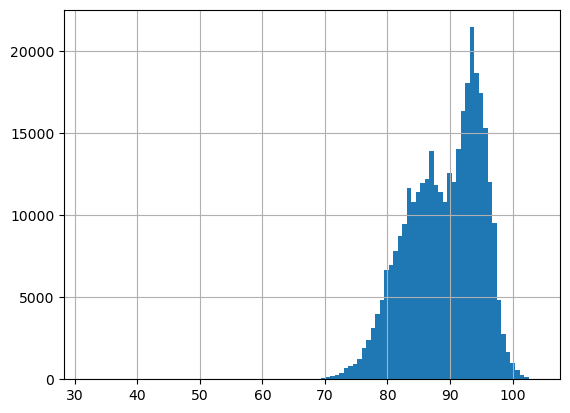

In [18]:
pitch_swing_data['release_speed'].hist(bins = 100)

<Axes: >

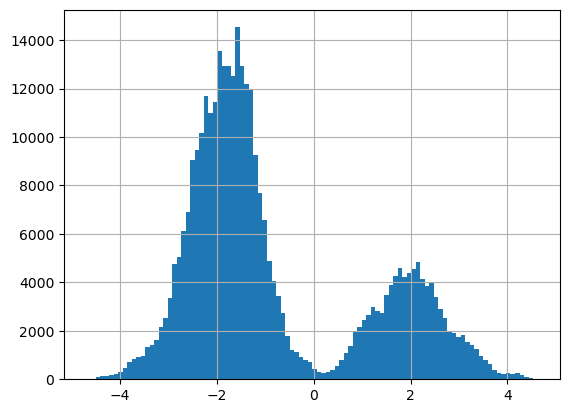

In [20]:
pitch_swing_data['release_pos_x'].hist(bins = 100)

<Axes: >

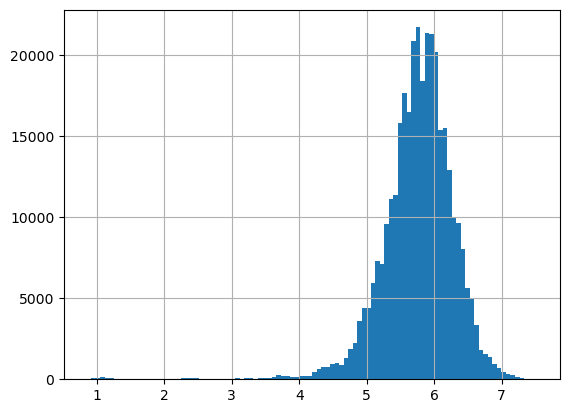

In [21]:
pitch_swing_data['release_pos_z'].hist(bins = 100)

In [22]:
pitch_swing_data['player_name'].nunique()

559

In [23]:
pitch_swing_data['batter'].nunique()

559

In [24]:
pitch_swing_data['pitcher'].nunique()

689

In [26]:
pitch_swing_data['events'].value_counts()

events
field_out                       36512
strikeout                       19716
single                          12643
walk                             7042
double                           3812
home_run                         2532
force_out                        1716
grounded_into_double_play        1614
hit_by_pitch                     1012
sac_fly                           621
field_error                       570
triple                            353
sac_bunt                          225
fielders_choice                   176
fielders_choice_out               163
double_play                       161
caught_stealing_2b                131
strikeout_double_play              57
catcher_interf                     55
other_out                           9
caught_stealing_home                6
caught_stealing_3b                  6
pickoff_1b                          4
stolen_base_2b                      2
sac_fly_double_play                 2
pickoff_caught_stealing_3b          1
picko

In [27]:
pitch_swing_data['description'].value_counts()

description
ball                       115169
foul                        62378
hit_into_play               61105
called_strike               57244
swinging_strike             35799
blocked_ball                 7308
foul_tip                     3654
swinging_strike_blocked      1877
hit_by_pitch                 1012
foul_bunt                     586
missed_bunt                    94
pitchout                       20
bunt_foul_tip                   4
Name: count, dtype: int64

In [32]:
pitch_swing_data['spin_dir'].value_counts()

Series([], Name: count, dtype: int64)

In [33]:
pitch_swing_data['spin_rate_deprecated'].value_counts()

Series([], Name: count, dtype: int64)

In [34]:
pitch_swing_data['break_angle_deprecated'].value_counts()

Series([], Name: count, dtype: int64)

In [35]:
pitch_swing_data['break_length_deprecated'].value_counts()

Series([], Name: count, dtype: int64)

In [36]:
pitch_swing_data['zone'].value_counts()

zone
14.0    66145
13.0    42739
11.0    35822
12.0    28753
5.0     26187
8.0     22494
6.0     21387
4.0     20401
9.0     20097
2.0     17517
7.0     16550
1.0     14514
3.0     13392
Name: count, dtype: int64

In [37]:
pitch_swing_data['des'].value_counts()

des
Bryan De La Cruz strikes out swinging.                                                            365
Ezequiel Tovar strikes out swinging.                                                              359
Cal Raleigh strikes out swinging.                                                                 357
Kyle Schwarber strikes out swinging.                                                              348
Paul DeJong strikes out swinging.                                                                 335
                                                                                                 ... 
Tyler Fitzgerald flies out to center fielder Andy Pages.                                            1
Chas McCormick singles on a line drive to left fielder Brandon Nimmo.   Mauricio Dubón scores.      1
Trey Cabbage flies out to center fielder Harrison Bader.   Mauricio Dubón to 3rd.                   1
Austin Slater grounds out to first baseman Cavan Biggio.                      

In [38]:
pitch_swing_data['game_type'].value_counts()

game_type
R    346250
Name: count, dtype: int64

In [39]:
pitch_swing_data['stand'].value_counts()

stand
R    200003
L    146247
Name: count, dtype: int64

In [40]:
pitch_swing_data['p_throws'].value_counts()

p_throws
R    252561
L     93689
Name: count, dtype: int64

In [29]:
pitch_swing_data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher_1',
       'fielder_2_1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima